<a href="https://colab.research.google.com/github/Jencinias/Ensemble-Based-Traffic-Sign-Recognition/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Todo
#Make the data analysis more clear
#Add comments
#Make a new folder for the downsampled data with the images that aren't used

In [38]:
import pandas as pd
import os
import cv2 as cv
from google.colab.patches import cv2_imshow

In [39]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Visualize the Data

In [40]:
#Using Pandas creates a dateframe with the contents of the road_sign.csv
df = pd.read_csv("/content/drive/MyDrive/road_sign.csv")

#Shows the first 5 rows of the dataframe
print(df.head())

      filename  width  height         class  xmin  ymin  xmax  ymax
0    road0.png    267     400  trafficlight    98    62   208   232
1    road1.png    400     283  trafficlight   154    63   258   281
2   road10.png    400     267  trafficlight   106     3   244   263
3  road100.png    400     385    speedlimit    35     5   363   326
4  road101.png    400     200    speedlimit   195     7   392   194


In [41]:
#Gets the count of each class in the dataframe
counts = df["class"].value_counts()

#print(counts)

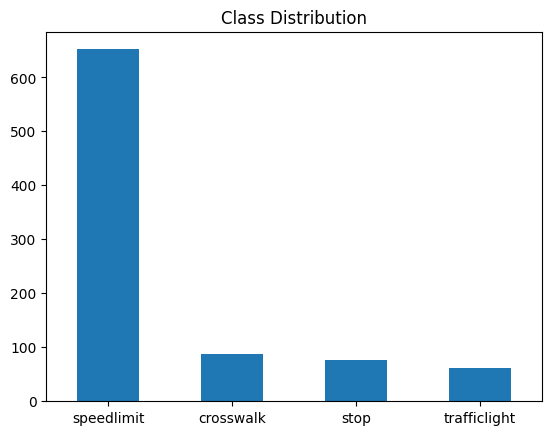

In [42]:
# create bar plot of counts
ax = counts.plot.bar(rot=0, title="Class Distribution")

In [43]:
#Gets and stores the path to the road_sign_images folder
images = os.listdir("drive/MyDrive/road_sign_images")

#print(images)

In [44]:
row = df.loc[df["filename"] == images[0]]  #Gets the row that has the same file name as the first image

#Gets each value for the coordinates to build a bounding box from that row
xmin = row["xmin"].values[0]
ymin = row["ymin"].values[0]
xmax = row["xmax"].values[0]
ymax = row["ymax"].values[0]

#creates a color and thickness that will be used to create the bounding box
color = (0,255,0)
thickness = 2

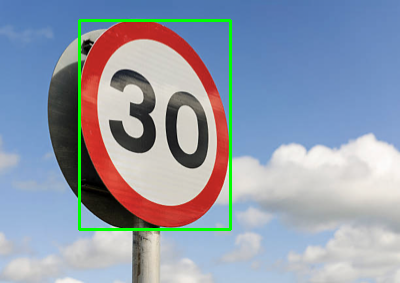

In [45]:
#Reads the first image in images
image = cv.imread(f"drive/MyDrive/road_sign_images/{images[0]}")

#Draws a rectangle using the two points from the csv file
cv.rectangle(image, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)

#Shows the image and bounding box
cv2_imshow(image)

In [46]:
print(image.shape) #checking first image size

(283, 400, 3)


###After looking at other images it is obivious that they are all different sizes so a standardize size will be needed.

In [47]:
area = []    #Creates an empty list for the area of the images
for i in images:
  image = cv.imread(f"drive/MyDrive/road_sign_images/{i}")    #Reads an image of the current iteration
  height, width, channel = image.shape     #Stores height, width, and channel from the shape function


  area.append(width * height)   #Appends the area of the image to area list
print(area)

[113200, 145600, 106800, 128000, 101600, 109600, 128000, 106800, 120000, 90000, 120400, 106800, 106800, 113200, 106800, 106800, 120000, 106800, 106800, 90000, 90000, 98800, 106800, 98400, 154000, 80000, 120800, 106800, 120400, 132800, 88800, 94000, 120000, 106800, 120000, 106000, 98800, 106800, 106400, 107600, 106400, 112400, 66400, 97600, 106800, 109200, 91200, 106800, 120000, 106800, 120000, 100800, 106800, 117200, 120000, 120000, 90800, 90000, 106800, 120000, 106800, 107200, 120000, 106800, 120000, 90000, 120000, 134800, 99200, 106800, 120000, 106800, 160000, 120000, 91200, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 128000, 106800, 120000, 120000, 120000, 120000, 120000, 120000, 128000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 122400, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 106800, 120000, 120000, 120000, 120000, 120000, 120000, 106800, 

66400
160000
42
72


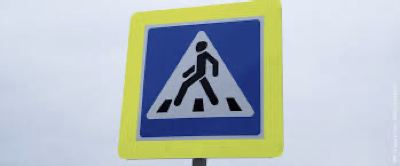

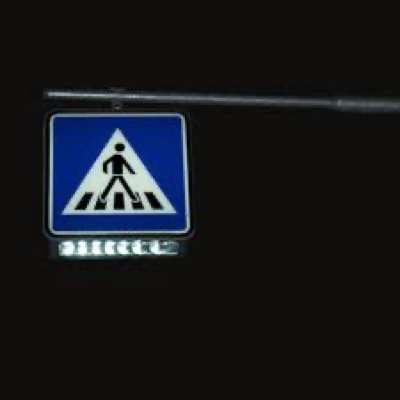

(166, 400, 3)
(400, 400, 3)


In [48]:
min_area = min(area)   #Gets the min value from the list of areas
max_area = max(area)   #Gets the max value from the list of areas
print(min_area)
print(max_area)

min_index = area.index(min_area)  #Gets the index of the min value from the list
max_index = area.index(max_area)  #Gets the index of the max value from the list

print(min_index)
print(max_index)

min_image = cv.imread(f"drive/MyDrive/road_sign_images/{images[min_index]}")   #Reads the smallest image
max_image = cv.imread(f"drive/MyDrive/road_sign_images/{images[max_index]}")   #Reads the biggest image

#Shows the images
cv2_imshow(min_image)
cv2_imshow(max_image)

print(min_image.shape)
print(max_image.shape)

# Continue exploring down sampling of the oversaturated classes.

In [49]:
#speedlimit      652
#crosswalk        88
#stop             76
#trafficlight     61

#Separates each class into its own dataframe
majority_class = df[df["class"] == counts.idxmax()]
cw_class = df[df["class"] == "crosswalk"]
stop_class = df[df["class"] == "stop"]
minority_class = df[df["class"] == counts.idxmin()]

#down samples each class to the same size as the minority class
downsampled_majority = majority_class.sample(n=int(len(minority_class)), random_state=42)
downsampled_cw = cw_class.sample(n=int(len(minority_class)), random_state=42)
downsampled_stop = stop_class.sample(n=int(len(minority_class)), random_state=42)


#print(downsampled_majority.sample(frac=1).reset_index(drop=True))
#print(downsampled_cw.sample(frac=1).reset_index(drop=True))
#print(downsampled_stop.sample(frac=1).reset_index(drop=True))

In [53]:
#Creates a new dataframe that is balanced with the new down sampled classes
balanced_df = pd.concat([downsampled_majority, downsampled_cw, downsampled_stop, minority_class])

balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)   #Shuffles and resets the indexes of the new dataframe

print(balanced_df)

        filename  width  height         class  xmin  ymin  xmax  ymax
0    road858.png    300     400    speedlimit   119   144   140   164
1    road238.png    300     400    speedlimit   134   151   151   168
2     road78.png    400     267          stop    72    38   153   112
3    road710.png    300     400    speedlimit   133   134   164   165
4    road693.png    300     400    speedlimit    55   134   141   221
..           ...    ...     ...           ...   ...   ...   ...   ...
239  road128.png    400     267     crosswalk   216    51   341   191
240   road96.png    400     267          stop   209    58   326   179
241   road41.png    267     400  trafficlight   186     1   218    75
242  road126.png    268     400     crosswalk   102    80   174   179
243   road37.png    267     400  trafficlight   116   103   156   230

[244 rows x 8 columns]


In [54]:
#Gets the count of each class from the new balanced dataframe
counts = balanced_df["class"].value_counts()
print(counts)

speedlimit      61
stop            61
crosswalk       61
trafficlight    61
Name: class, dtype: int64


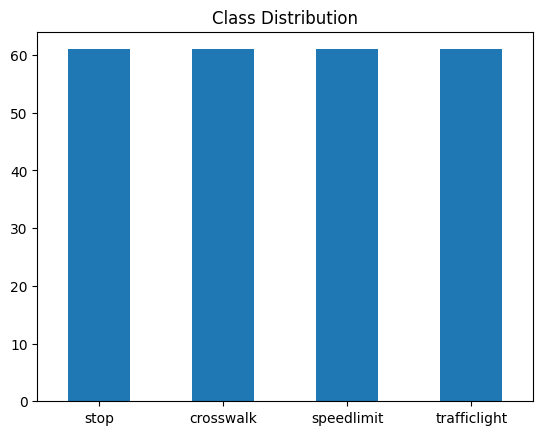

In [52]:
# create bar plot of counts
ax = counts.plot.bar(rot=0, title="Class Distribution")